In [30]:
import sqlite3 as db
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cnx = db.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.columns.tolist()

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [4]:
df=df.reindex_axis([ 'overall_rating',
 'id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes'],axis=1)

C:\Users\xt19143\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
overall_rating         183142 non-null float64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [6]:
df.describe()

,overall_rating,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,91989.50000,165671.524291,135900.617324,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,53110.01825,53851.094769,136927.840510,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,1.00000,2.000000,2625.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,45995.25000,155798.000000,34763.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,91989.50000,183488.000000,77741.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,137983.75000,199848.000000,191080.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,183978.00000,234141.000000,750584.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [12]:
df.isnull().sum()

overall_rating          836
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [13]:
df=df.dropna()

In [14]:
df.isna().sum()

overall_rating         0
id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [16]:
df.dtypes

overall_rating         float64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [17]:
df.preferred_foot.unique()

array(['right', 'left'], dtype=object)

In [18]:
df.attacking_work_rate.unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [19]:
df.defensive_work_rate.unique()

array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [20]:
df.head()

,overall_rating,id,player_fifa_api_id,player_api_id,date,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,1,218353,505942,2016-02-18 00:00:00,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,2,218353,505942,2015-11-19 00:00:00,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,3,218353,505942,2015-09-21 00:00:00,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,4,218353,505942,2015-03-20 00:00:00,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,5,218353,505942,2007-02-22 00:00:00,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
df=df.drop(df.columns[[1, 2, 3, 4]], axis=1)

In [22]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [24]:
df['preferred_foot'].value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

In [25]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [27]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [28]:
df=df.loc[df['preferred_foot'].isin(['right', 'left']) & df.attacking_work_rate.isin(['medium', 'high', 'low']) 
& df.defensive_work_rate.isin(['medium', 'high', 'low'])]

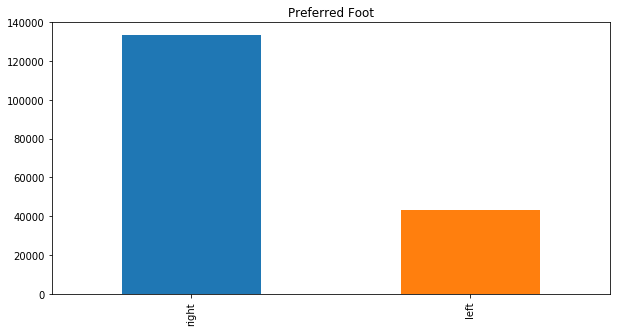

In [31]:
plt.figure(figsize=(10,5)) 
plt.title("Preferred Foot")
df['preferred_foot'].value_counts().plot.bar()

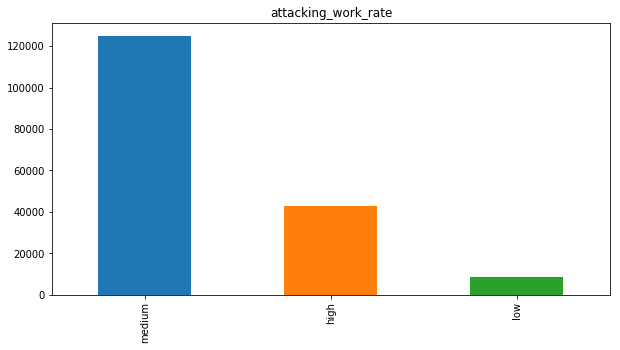

In [32]:
plt.figure(figsize=(10,5)) 
plt.title("attacking_work_rate")
df['attacking_work_rate'].value_counts().plot.bar()

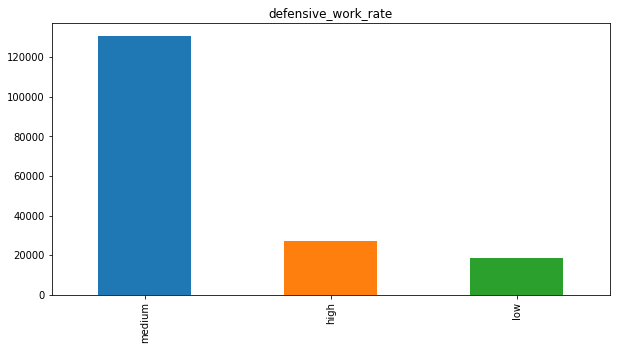

In [33]:
plt.figure(figsize=(10,5)) 
plt.title("defensive_work_rate")
df['defensive_work_rate'].value_counts().plot.bar()

In [36]:
# Label Encoding the Data

obj_columns=df.select_dtypes(['object']).columns
df[obj_columns]=df[obj_columns].apply(lambda x: x.astype('category'))
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes.astype('int64'))


In [37]:
# Splitting Dependent and Independent variables 
X=pd.DataFrame(df.iloc[: , 1:].values)
y=df.iloc[:, 0].values

In [38]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder_1 = OneHotEncoder(categorical_features = [1,2,3])
X = onehotencoder_1.fit_transform(X).toarray()

In [ ]:
# Avoiding the Dummy Variable Trap
# X=np.delete(X, [0,2,5], axis=1)

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\xt19143\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [42]:
import statsmodels.api as sm
X= sm.add_constant(X)
X_opt=X[:, :]
model = sm.OLS(y, X_opt).fit() ## sm.OLS(output, input)
predictions = model.predict(X_opt)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.462e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:07:24   Log-Likelihood:            -4.2913e+05
No. Observations:              176161   AIC:                         8.583e+05
Df Residuals:                  176121   BIC:                         8.587e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2964      0.045    -28.719      0.000      -1.385      -1.208
x1            -0.6471      0.024    -26.599      0.000      -0.695      -0.599
x2            -0.6493      0.024    -27.579      0.000      -0.695      -0.603
x3            -0.8189      0.022    -36.787      0.000      -0.863      -0.775
x4             0.4344      0.027     16.162      0.000       0.382       0.487
x5            -0.9119      0.018    -49.940      0.000      -0.948      -0.876
x6            -0.4761      0.022    -21.315      0.000      -0.520      -0.432
x7            -0.0762      0.022     -3.410      0.001      -0.120      -0.032
x8            -0.7441      0.017    -43.254      0.000      -0.778      -0.710
x9             0.3749      0.001    254.922      0.000       0.372       0.378
x10            0.0237      0.001     27.895      0.000       0.022       0.025
x11            0.0119      0.001     12.741      0.000       0.010       0.014
x12            0.0684      0.001     82.965      0.000       0.067       0.070
x13            0.0511      0.001     36.663      0.000       0.048       0.054
x14            0.0031      0.001      3.788      0.000       0.002       0.005
x15           -0.0114      0.001     -9.645      0.000      -0.014      -0.009
x16            0.0121      0.001     15.020      0.000       0.011       0.014
x17            0.0125      0.001     17.378      0.000       0.011       0.014
x18            0.0071      0.001      7.413      0.000       0.005       0.009
x19            0.1337      0.002     83.298      0.000       0.131       0.137
x20            0.0061      0.001      4.413      0.000       0.003       0.009
x21            0.0107      0.001      8.152      0.000       0.008       0.013
x22           -0.0088      0.001     -8.644      0.000      -0.011      -0.007
x23            0.2111      0.001    192.707      0.000       0.209       0.213
x24            0.0068      0.001      8.605      0.000       0.005       0.008
x25            0.0167      0.001     18.907      0.000       0.015       0.018
x26            0.0150      0.001     20.542      0.000       0.014       0.016
x27           -0.0039      0.001     -4.662      0.000      -0.005      -0.002
x28            0.0594      0.001     70.128      0.000       0.058       0.061
x29           -0.0137      0.001    -14.855      0.000      -0.016      -0.012
x30            0.0197      0.001     28.417      0.000       0.018       0.021
x31            0.0122      0.001     16.325      0.000       0.011       0.014
x32           -0.0105      0.001    -13.116      0.000      -0.012      -0.009
x33           -0.0022      0.001     -2.547      0.011      -0.004      -0.001
x34            0.0140      0.001     18.570      0.000       0.013       0.016
x35            0.0313      0.001     27.699      0.000       0.029       0.034
x3

#  Model gives ~85 % accuaracy and all the factors are important in predicting the Overall rating of a Player